In [1]:
import numpy as np

from tqdm.notebook import tqdm

from Mixers import FractalSwirl, Distribution

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

---
#### Global parameters

In [2]:
np.set_printoptions(precision=2)
gridLimit = 1.5e3

---
#### Run

In [3]:
MarkovChain = FractalSwirl
params = [10, .9]
step = 1

file_name = 'FractalSwirl9'

In [ ]:
##### === Output file === #
file = f'mt_data/{file_name}.csv'
! touch $file

# === Iteration over size of grid === #
while True:
    
    # === Markov chain === #
    mc = MarkovChain(*params)
    n = mc.shape[1]
    
    if n > gridLimit: break
    params[0] += step
    
    # === Iteration over sampled Dirac distributions === #
    for i,j in tqdm(mc.sample_map(), desc='Samples', leave=False):
        # === Initial distribution === #
        di = np.zeros([n, n]).view(Distribution)
        di[i, j] = 1

        # === Output list === #
        dInit = int((np.arange(0,.96,.05) > di.distance_from_stationarity(mc)).sum())
        milestone = 1 - (dInit + 1) * .05
        
        data = [n, i, j] + [0] * dInit
        
        # === Simulation === #
        t = 0
        while milestone > 0.2:
            di.update(mc)
            
            if (di.distance_from_stationarity(mc) < milestone):
                data.append(t)
                milestone -= .05
            
            t += 1

        # === Saving the data === #
        output = ','.join(f'{i}' for i in data)
        with open(file, 'a') as f:
            f.write(output + '\n')

Samples:   0%|          | 0/128 [00:00<?, ?it/s]

---

In [27]:
MarkovChain = FractalSwirl
params = [6, .9]

mc = MarkovChain(*params)
n = mc.shape[1]

ms_max = 9
ms_min = 1
data = np.zeros((ms_max-ms_min, n//2, n//2))

for k in tqdm(range(n*n//4)):
    i, j = k//(n//2), k%(n//2)
    
    di = np.zeros([n, n]).view(Distribution)
    di[i, j] = 1

    # === Output list === #
    milestone = ms_max
    t = 0
    while milestone > ms_min:
        di.update(mc)

        if (di.distance_from_stationarity(mc) < milestone/10):
            data[ms_max-milestone, i, j] = t
            milestone -= 1

        t += 1

  0%|          | 0/1024 [00:00<?, ?it/s]

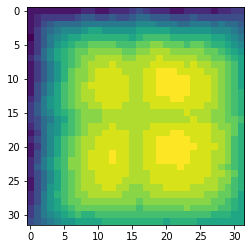

In [28]:
imshow(data[1])

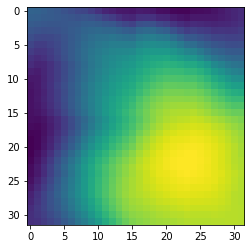

In [29]:
imshow(data[7])

---
---
---